In [16]:
# importation des bibliotheques
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Connexion a la base de donnees 
conn = sqlite3.connect('../Datas/db/fraude_detection_warehouse_.db')

# Requete SQL pour recuperer les donnees de la table 'transaction'
transactions_df = pd.read_sql_query('SELECT * FROM transactions', conn)

# Conversion de la colonne 'transaction_date' en format datetime
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])

### 1) Nombre de transactions par jour/semaine/mois

In [ ]:
# Nombre de transactions par jour/semaine/mois
print("Nombre de transactions par jour/semaine/mois:")
print(transactions_df.groupby(pd.Grouper(key='transaction_date', freq='D')).size())
print(transactions_df.groupby(pd.Grouper(key='transaction_date', freq='W')).size())
print(transactions_df.groupby(pd.Grouper(key='transaction_date', freq='M')).size())

### 1.1) Nombre de transactions par jour

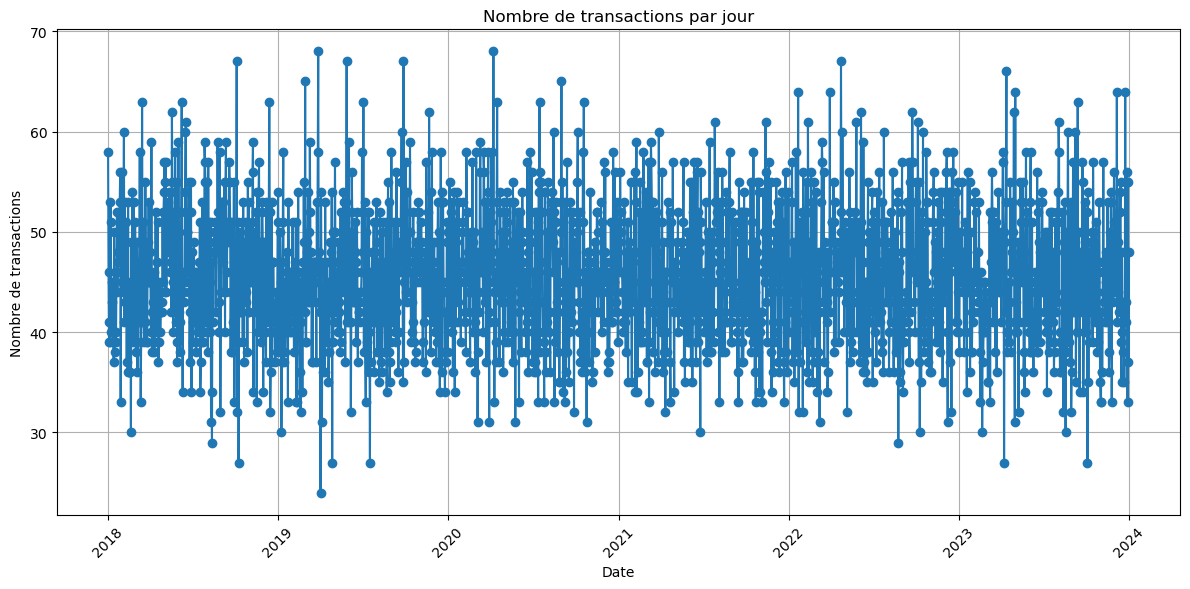

In [18]:
# Extraction du nombre de transactions par jour
daily_counts = transactions_df.groupby(transactions_df['transaction_date'].dt.date).size()

# Tracé du graphique
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('Nombre de transactions par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de transactions')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

c:\Users\ESPace-TEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ESPace-TEK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


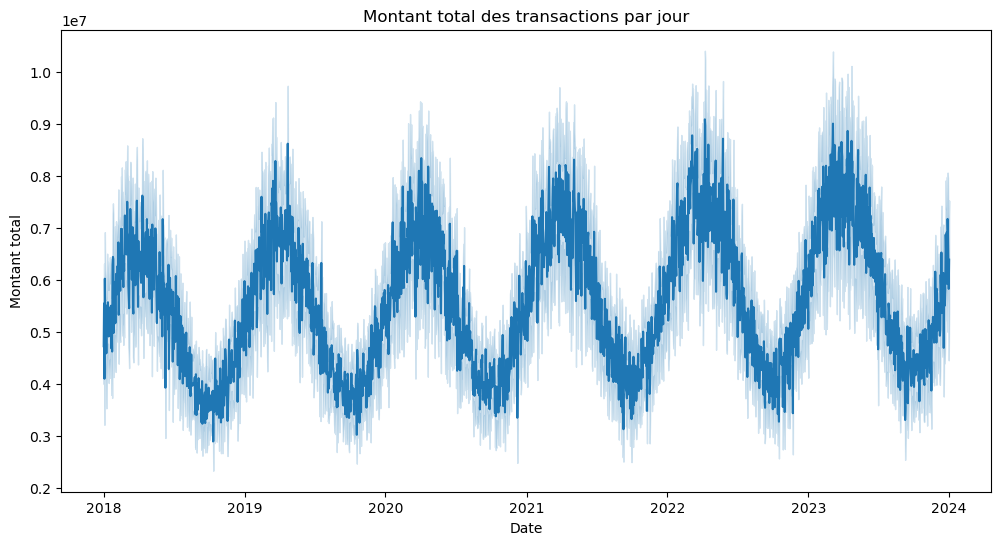

In [23]:
# Visualisation des données
plt.figure(figsize=(12, 6))
sns.lineplot(x=transactions_df['transaction_date'], y=transactions_df['amount'])
plt.title("Montant total des transactions par jour")
plt.xlabel("Date")
plt.ylabel("Montant total")
plt.show()

### 2) Montant total des transactions par jour/semaine/mois

In [ ]:
# Montant total des transactions par jour/semaine/mois
print("\nMontant total des transactions par jour/semaine/mois:")
print(transactions_df.groupby(pd.Grouper(key='transaction_date', freq='D'))['amount'].sum())
print(transactions_df.groupby(pd.Grouper(key='transaction_date', freq='W'))['amount'].sum())
print(transactions_df.groupby(pd.Grouper(key='transaction_date', freq='M'))['amount'].sum())

### 2.1) Montant total des transactions par jour

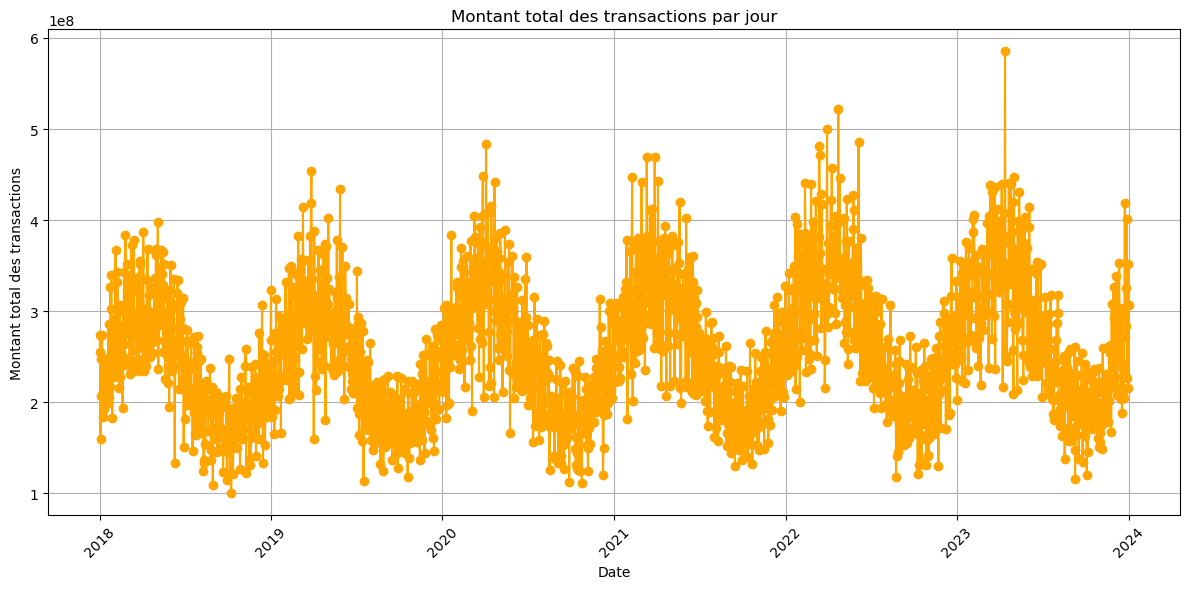

In [19]:
# Extraction du montant total des transactions par jour
daily_amounts = transactions_df.groupby(transactions_df['transaction_date'].dt.date)['amount'].sum()

# Tracé du graphique
plt.figure(figsize=(12, 6))
plt.plot(daily_amounts.index, daily_amounts.values, marker='o', color='orange')
plt.title('Montant total des transactions par jour')
plt.xlabel('Date')
plt.ylabel('Montant total des transactions')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### 3) Heure de la journée la plus fréquente pour les transactions

In [21]:
# Extraction de l'heure des transactions
transactions_df['hour'] = transactions_df['transaction_date'].dt.hour

# Calcul de l'heure la plus fréquente
most_frequent_hour = transactions_df['hour'].mode()[0]
# ou : print(transactions_df.groupby('hour')['transaction_id'].count().idxmax())

# Affichage de l'heure la plus fréquente
print("L'heure de la journée la plus fréquente pour les transactions est : ", most_frequent_hour)

L'heure de la journée la plus fréquente pour les transactions est :  0


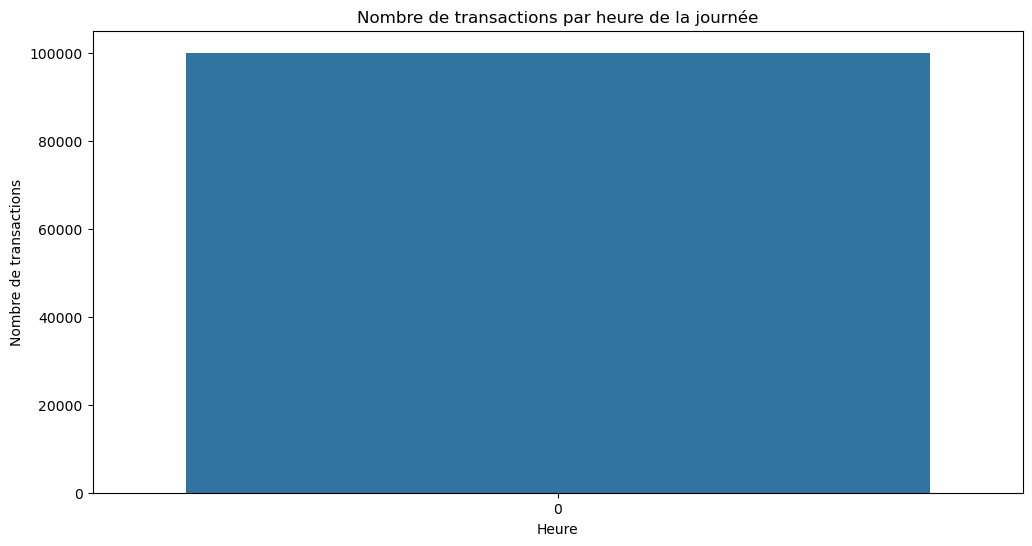

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x=transactions_df['hour'])
plt.title("Nombre de transactions par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Nombre de transactions")
plt.show()